## Ch8. 基於影像的深度學習案例

### 影像修復與辨識實驗之程式碼介紹

In [ ]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
class CNN(nn.Module): # 定義辨識 CNN 網路
    def __init__(self):
        super(CNN, self).__init__()  

        self.layer1 = nn.Sequential(        # 使用 nn.Sequential 將一連串運算包起來
            nn.Conv2d(                      # 定義 2D 卷機層
                in_channels=1,              # 定義輸入通道數
                out_channels=16,            # 定義輸出通道數
                kernel_size=5,              # 定義卷積核大小
                stride=1,                   # 定義卷積的步伐大小
                padding=2,                  # 定義填充大小
            ),
            nn.ReLU(),                      # 定義激活函數 ReLU
            nn.MaxPool2d(kernel_size = 2),  # 定義池化層，最大池化(MaxPooling)
        )
        
        self.layer2 = nn.Sequential( 
            nn.Conv2d(16,32,5,1,2),         # 定義 2D 卷機層
            nn.ReLU(),                      # 定義激活函數 ReLU
            nn.MaxPool2d(2)                 # 定義池化層，最大池化(MaxPooling)
        )
        
        self.out = nn.Linear(32*7*7, 10)    # 定義線性轉換層作為輸出層
                                            # 將特徵攤平後丟入此層，進行線性轉換，輸出分類結果
    
    def forward(self,x):                    # 定義資料如何傳遞，x 表示傳入的特徵
       x = self.layer1(x)                   # 經過定義好的 layer1
       x = self.layer2(x)                   # 經過定義好的 layer2
       x = x.view(x.size(0), -1)            # 將資料攤平
       output = self.out(x)                 # 將特徵傳入輸出層
       return output


In [ ]:
DOWNLOAD_MNIST = True                              # 定義是否要下載 Mnist 資料集

train_data = torchvision.datasets.MNIST(           # 準備 Mnist 訓練集
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),   # 將資料轉換成 tensor
    download=DOWNLOAD_MNIST
)
test_data = torchvision.datasets.MNIST(            # 準備 Mnist 測試集
    root='./mnist/', 
    train=False,
    transform=torchvision.transforms.ToTensor(),   # 將資料轉換成 tensor
    download=DOWNLOAD_MNIST,
)


BATCH_SIZE = 50                                    # 定義 batch size 
train_loader = Data.DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle=True) # 定義 dataloader
test_loader = Data.DataLoader(dataset = test_data, batch_size = 1, shuffle=False)

# 定義訓練時的超參數
EPOCH = 20              # 定義 Epoch數
LR = 0.001              # 定義學習率
if_use_gpu = True       # 定義是否要用 GPU  
img_size = 28*28        # 定義影像大小

if __name__ == "__main__":
    cnn = CNN()                                             # 實例化事先定義好的網路
    optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # 定義優化器，使用Adam作為優化器
    loss_function = nn.CrossEntropyLoss()                   # 定義損失函數，使用CrossEntropyLoss
    if if_use_gpu:                                          # 是否要使用GPU進行訓練
        cnn = cnn.cuda()                                    # 若為是：將網路傳至GPU
    
    for epoch in range(EPOCH):
        for step, (x, y) in enumerate(train_loader):        # 將訓練資料迭代取出
            if if_use_gpu:                                  # 是否要使用GPU進行訓練
                x = x.cuda()                                # 若為是：將訓練資料傳至GPU
                y = y.cuda()      
            output = cnn(x)                                 # 將影像資料傳入網路中
            loss = loss_function(output, y)                 # 將網路的輸出與標準答案傳入損失函數，計算損失
            optimizer.zero_grad()                           # 將優化器中的梯度設為 0
            loss.backward()                                 # 反向傳播計算梯度
            optimizer.step()                                # 優化器進行模型參數更新
            if step % 1000 == 0:                            # 每100個 iteration 將數據印出，方便查看訓練過程是否有收斂
                print('Epoch:', '%2s' % epoch, '|Step:', '%5s' % step, 
                      '|Train loss:%.4f'%loss.data)

    torch.save(cnn.state_dict(), "./cnn.pt")                # 訓練完成後將模型參數存起來

Epoch:  0 |Step:     0 |Train loss:2.3131
Epoch:  0 |Step:  1000 |Train loss:0.1126
Epoch:  1 |Step:     0 |Train loss:0.0543
Epoch:  1 |Step:  1000 |Train loss:0.0052
Epoch:  2 |Step:     0 |Train loss:0.0185
Epoch:  2 |Step:  1000 |Train loss:0.0423
Epoch:  3 |Step:     0 |Train loss:0.0014
Epoch:  3 |Step:  1000 |Train loss:0.0693
Epoch:  4 |Step:     0 |Train loss:0.0251
Epoch:  4 |Step:  1000 |Train loss:0.0304
Epoch:  5 |Step:     0 |Train loss:0.0305
Epoch:  5 |Step:  1000 |Train loss:0.0747
Epoch:  6 |Step:     0 |Train loss:0.0067
Epoch:  6 |Step:  1000 |Train loss:0.0502
Epoch:  7 |Step:     0 |Train loss:0.0042
Epoch:  7 |Step:  1000 |Train loss:0.0060
Epoch:  8 |Step:     0 |Train loss:0.0051
Epoch:  8 |Step:  1000 |Train loss:0.0001
Epoch:  9 |Step:     0 |Train loss:0.0067
Epoch:  9 |Step:  1000 |Train loss:0.0008
Epoch: 10 |Step:     0 |Train loss:0.0251
Epoch: 10 |Step:  1000 |Train loss:0.0442
Epoch: 11 |Step:     0 |Train loss:0.0005
Epoch: 11 |Step:  1000 |Train loss

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

cnn = CNN()
cnn.load_state_dict(torch.load("./cnn.pt", map_location="cuda:0")) # 將先前訓練好的結果讀入
if if_use_gpu:                                                     # 是否要使用GPU進行訓練
    cnn = cnn.cuda()                                               # 若為是：將網路傳至GPU

for noisy in range(0,4):                                           # 使用for 迴圈，進行不同雜訊的辨識 （包含：0%, 5%, 10%, 15%）
    error = 0                       
    for step, (x, y) in enumerate(test_loader):
        if if_use_gpu:                                             # 是否要使用 GPU 進行訓練
            x = x.cuda()                                           # 若為是：將訓練資料傳至GPU
            y = y.cuda()
        
        # 製作隨機抽樣的雜訊影像
        random_seq = random.sample([n for n in range(img_size)], np.int32(img_size*0.05*noisy)) 
        
        # 將x攤平後，再將特定位置的像素值改成1
        x = x.reshape(-1,img_size)
        x[0][random_seq]=1
        
        # 將x 變形為原大小
        x = torch.reshape(x,(1,1,28,28))
        
        # 將測試資料傳入網路
        output = cnn(x)
        result = torch.argmax(output,dim=1)
        A = result.tolist()
        B = y.tolist()
        
        # 記錄錯誤值
        if A[0] != B[0]:
            error+=1
        
    error_rate = error/10000
    
    # 印出不同受損影像的準確度
    print("Noisy ", '%.2f' % (0.05*noisy*100), "%")
    print("The error rate is ", error_rate*100,"%")
    print("The accuracy rate is ", (1-error_rate)*100,"%") 
    print("-"*20)

Noisy  0.00 %
The error rate is  1.06 %
The accuracy rate is  98.94 %
--------------------
Noisy  5.00 %
The error rate is  3.66 %
The accuracy rate is  96.34 %
--------------------
Noisy  10.00 %
The error rate is  8.84 %
The accuracy rate is  91.16 %
--------------------
Noisy  15.00 %
The error rate is  17.150000000000002 %
The accuracy rate is  82.85 %
--------------------


In [ ]:
for noisy in range(4): # 使用不同程度的雜訊影像來訓練辨識模型
    
    cnn = CNN()                                             # 實例化辨識網路
    optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # 建立優化器，選擇 Adam 做為優化器
    loss_function = nn.CrossEntropyLoss()                   # 使用cross entropy作為損失函數
    if if_use_gpu:                                          # 是否使用GPU
        cnn = cnn.cuda()                                    # 將網路移至GPU
    
    for epoch in range(EPOCH):                              # 開始訓練網路
        for step, (x, y) in enumerate(train_loader):        # 將資料迭代產生出來
            if if_use_gpu:                                  # 是否使用GPU
                x = x.cuda()                                # 將訓練資料移至GPU
                y = y.cuda()
            
            for index in range(BATCH_SIZE):                 # 加雜訊至影像上
                random_seq = random.sample([n for n in range(img_size)], np.int32(img_size*0.05*noisy))
                x = x.reshape(-1, img_size)
                x[index][random_seq]=1
                
            x = torch.reshape(x,(BATCH_SIZE,1,28,28))       
            
            output = cnn(x)                                 # 產生預測結果
            loss = loss_function(output, y)                 # 將模型預測的結果與標準答案傳入損失函數，計算損失
            optimizer.zero_grad()                           # 將優化器中的梯度設為 0
            loss.backward()                                 # 反向傳播計算梯度
            optimizer.step()                                # 優化器進行模型參數更新
            if step % 1000 == 0:                            # 印出訓練資訊：在不同階段的損失值
                print('Epoch:', '%2s' % epoch, '|Step:', '%5s' % step, '|Train loss:%.4f'%loss.data)

    torch.save(cnn.state_dict(), "./cnn"+str(noisy)+".pt")  # 存下訓練結果

Epoch:  0 |Step:     0 |Train loss:2.3113
Epoch:  0 |Step:  1000 |Train loss:0.0429
Epoch:  1 |Step:     0 |Train loss:0.0074
Epoch:  1 |Step:  1000 |Train loss:0.0611
Epoch:  2 |Step:     0 |Train loss:0.0169
Epoch:  2 |Step:  1000 |Train loss:0.0102
Epoch:  3 |Step:     0 |Train loss:0.0714
Epoch:  3 |Step:  1000 |Train loss:0.0031
Epoch:  4 |Step:     0 |Train loss:0.0025
Epoch:  4 |Step:  1000 |Train loss:0.0378
Epoch:  5 |Step:     0 |Train loss:0.0023
Epoch:  5 |Step:  1000 |Train loss:0.0011
Epoch:  6 |Step:     0 |Train loss:0.0439
Epoch:  6 |Step:  1000 |Train loss:0.0989
Epoch:  7 |Step:     0 |Train loss:0.0538
Epoch:  7 |Step:  1000 |Train loss:0.0180
Epoch:  8 |Step:     0 |Train loss:0.0023
Epoch:  8 |Step:  1000 |Train loss:0.0080
Epoch:  9 |Step:     0 |Train loss:0.0007
Epoch:  9 |Step:  1000 |Train loss:0.0003
Epoch: 10 |Step:     0 |Train loss:0.0060
Epoch: 10 |Step:  1000 |Train loss:0.0006
Epoch: 11 |Step:     0 |Train loss:0.0013
Epoch: 11 |Step:  1000 |Train loss

In [ ]:
import torch.nn.functional as F
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import random
import numpy as np
import cv2

In [ ]:
cnn = CNN()                                                                         # 實例化辨識網路
for i in range(4):
    cnn.load_state_dict(torch.load("./cnn"+str(i)+".pt", map_location="cuda:0"))    # 將先前訓練好的辨識網路載入
    if if_use_gpu:
        cnn = cnn.cuda()
    
    for noisy in range(0,4): # 0%, 5%, 10%, 15%
        error = 0
        for step, (x, y) in enumerate(test_loader):
            if if_use_gpu:                                                          # 是否使用 GPU
                x = x.cuda()                                                        # 將測試資料傳到 GPU
                y = y.cuda()
            
            # 加上雜訊
            random_seq = random.sample([n for n in range(img_size)], np.int32(img_size*0.05*noisy)) 
            x = x.reshape(-1,img_size)
            x[0][random_seq]=1
            x = torch.reshape(x,(1,1,28,28))
            
            output = cnn(x) # 產生預測結果
            result = torch.argmax(output,dim=1)
            A = result.tolist()
            B = y.tolist()
            if A[i] != B[i]:
                error+=1
        
        # 印出錯誤率
        error_rate = error/10000
        print("Noisy ", '%.2f' % (0.05*noisy*100), "%")
        print("The error rate is ", error_rate*100,"%")
        print("The accuracy rate is ", (1-error_rate)*100,"%") 
        print("-"*20)
    print("="*40)

Noisy  0.00 %
The error rate is  0.95 %
The accuracy rate is  99.05000000000001 %
--------------------
Noisy  5.00 %
The error rate is  4.09 %
The accuracy rate is  95.91 %
--------------------
Noisy  10.00 %
The error rate is  12.09 %
The accuracy rate is  87.91 %
--------------------
Noisy  15.00 %
The error rate is  22.06 %
The accuracy rate is  77.94 %
--------------------
Noisy  0.00 %
The error rate is  0.84 %
The accuracy rate is  99.16 %
--------------------
Noisy  5.00 %
The error rate is  0.96 %
The accuracy rate is  99.03999999999999 %
--------------------
Noisy  10.00 %
The error rate is  1.21 %
The accuracy rate is  98.79 %
--------------------
Noisy  15.00 %
The error rate is  1.67 %
The accuracy rate is  98.33 %
--------------------
Noisy  0.00 %
The error rate is  1.27 %
The accuracy rate is  98.72999999999999 %
--------------------
Noisy  5.00 %
The error rate is  1.01 %
The accuracy rate is  98.99 %
--------------------
Noisy  10.00 %
The error rate is  1.05 %
The acc

In [ ]:
class ConActiv(nn.Module): # 定義卷積層與激活函數，在下方的UNet中使用
    def __init__(self, in_ch, out_ch, bn=True, sample='none-3', activ='relu',
                 conv_bias=False):
        super().__init__()
        if sample == 'down-5':
            self.conv = nn.Conv2d(in_ch, out_ch, 5, 2, 2, dilation=1, groups=1, bias=conv_bias)
        elif sample == 'down-7':
            self.conv = nn.Conv2d(in_ch, out_ch, 7, 2, 3, dilation=1, groups=1, bias=conv_bias)
        if bn:
            self.bn = nn.BatchNorm2d(out_ch)
        if activ == 'relu':
            self.activation = nn.ReLU()
        elif activ == 'leaky':
            self.activation = nn.LeakyReLU(negative_slope=0.2)

    def forward(self, input):
        h = self.conv(input)
        if hasattr(self, 'bn'):      # 假設有bn的屬性，就做batch normalization
            h = self.bn(h)
        if hasattr(self, 'activation'): # 假設有activation的屬性，就再經過激活函數
            h = self.activation(h)
        return h

        

In [ ]:
class UNet(nn.Module):  # 定義 UNet
    
    def __init__(self, layer_size=2, input_channels=1, upsampling_mode='nearest'):
        super().__init__()
        self.freeze_enc_bn = False
        self.upsampling_mode = upsampling_mode
        self.layer_size = layer_size
        self.enc_1 = ConActiv(input_channels, 64, bn=False, sample='down-7')
        self.enc_2 = ConActiv(64, 128, sample='down-5')
        
        self.dec_2 = ConActiv(128 + 64, 64, activ='leaky')
        self.dec_1 = ConActiv(64 + input_channels, input_channels,
                              bn=False, activ=None, conv_bias=True)
    def forward(self, input):
        h_dict = {}  
        h_dict['h_0']= input
        h_key_prev = 'h_0'
        
        # 進行編碼
        for i in range(1, self.layer_size + 1):
            l_key = 'enc_{:d}'.format(i)
            h_key = 'h_{:d}'.format(i)
            h_dict[h_key] = getattr(self, l_key)(   # 呼叫該物件之屬性，使用編碼層
                h_dict[h_key_prev])
            h_key_prev = h_key
        
        h_key = 'h_{:d}'.format(self.layer_size)
        h = h_dict[h_key]
        
        # 進行解碼
        for i in range(self.layer_size, 0, -1):
            enc_h_key = 'h_{:d}'.format(i - 1)
            dec_l_key = 'dec_{:d}'.format(i)
            h = F.interpolate(h, scale_factor=2, mode=self.upsampling_mode)
            h = torch.cat([h, h_dict[enc_h_key]], dim=1)
            h= getattr(self, dec_l_key)(h)          # 呼叫該物件之屬性，使用解碼層

        return h

        

In [ ]:
import copy

In [ ]:
unet = UNet()                                             # 實例化還原網路       
if if_use_gpu:                                            # 若使用GPU，須將網路傳至GPU上
    unet = unet.cuda()
optimizer = torch.optim.Adam(unet.parameters(), lr=LR)    # 建立優化器，使用ADAM作為優化器
loss_function = nn.L1Loss()                               # 定義損失函數，使用L1 Loss

for epoch in range(20):                                   # 訓練雜訊網路
    for step, (x, y) in enumerate(train_loader):        
        if if_use_gpu:
            x = x.cuda()
        original_x = copy.deepcopy(x)
        for index in range(BATCH_SIZE):
            # 為每張圖增加雜訊 
            random_seq = random.sample([n for n in range(img_size)], 
                                       np.int32(img_size*0.05*random.randint(0, 3)))
            noise_x = x.reshape(-1, img_size)
            noise_x[index][random_seq] = 1
        
        noise_x = torch.reshape(noise_x, (BATCH_SIZE,1,28,28))
        output = unet(noise_x)                            # 將雜訊圖傳入影像還原網路進行修復
        loss = loss_function(output, original_x)          # 計算損失
        
        optimizer.zero_grad()                             # 將優化器中的梯度設為 0
        loss.backward()                                   # 反向傳播
        optimizer.step()                                  # 參數更新
        if step % 1000 == 0:
            print('Epoch:', '%2s' % epoch, '|Step:', '%5s' % step, '|Train loss:%.4f'%loss.data)

torch.save(unet.state_dict(), "./unet_restore.pt")        # 存下復原網路參數


Epoch:  0 |Step:     0 |Train loss:0.4018
Epoch:  0 |Step:  1000 |Train loss:0.0363
Epoch:  1 |Step:     0 |Train loss:0.0404
Epoch:  1 |Step:  1000 |Train loss:0.0249
Epoch:  2 |Step:     0 |Train loss:0.0213
Epoch:  2 |Step:  1000 |Train loss:0.0217
Epoch:  3 |Step:     0 |Train loss:0.0217
Epoch:  3 |Step:  1000 |Train loss:0.0229
Epoch:  4 |Step:     0 |Train loss:0.0200
Epoch:  4 |Step:  1000 |Train loss:0.0190
Epoch:  5 |Step:     0 |Train loss:0.0215
Epoch:  5 |Step:  1000 |Train loss:0.0191
Epoch:  6 |Step:     0 |Train loss:0.0198
Epoch:  6 |Step:  1000 |Train loss:0.0184
Epoch:  7 |Step:     0 |Train loss:0.0184
Epoch:  7 |Step:  1000 |Train loss:0.0179
Epoch:  8 |Step:     0 |Train loss:0.0173
Epoch:  8 |Step:  1000 |Train loss:0.0181
Epoch:  9 |Step:     0 |Train loss:0.0176
Epoch:  9 |Step:  1000 |Train loss:0.0233
Epoch: 10 |Step:     0 |Train loss:0.0172
Epoch: 10 |Step:  1000 |Train loss:0.0161
Epoch: 11 |Step:     0 |Train loss:0.0160
Epoch: 11 |Step:  1000 |Train loss

Noisy  0.00 %
The error rate 1 is  0.9299999999999999 %
The accuracy rate 1 is  99.07000000000001 %
The error rate 2 is  1.87 %
The accuracy rate 2 is  98.13 %


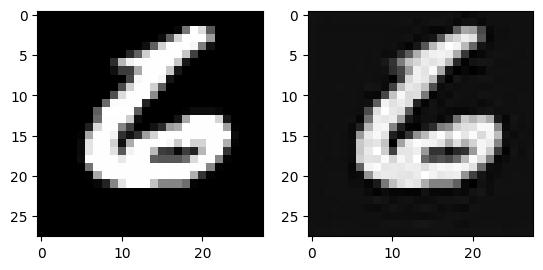

--------------------
Noisy  5.00 %
The error rate 1 is  4.3999999999999995 %
The accuracy rate 1 is  95.6 %
The error rate 2 is  1.08 %
The accuracy rate 2 is  98.92 %


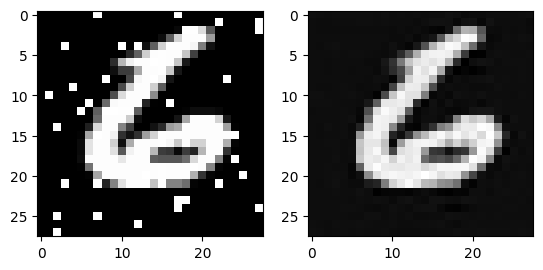

--------------------
Noisy  10.00 %
The error rate 1 is  11.55 %
The accuracy rate 1 is  88.44999999999999 %
The error rate 2 is  1.08 %
The accuracy rate 2 is  98.92 %


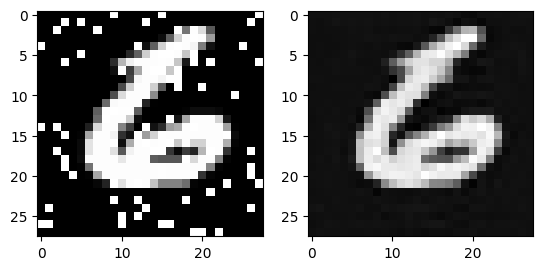

--------------------
Noisy  15.00 %
The error rate 1 is  21.05 %
The accuracy rate 1 is  78.95 %
The error rate 2 is  1.06 %
The accuracy rate 2 is  98.94 %


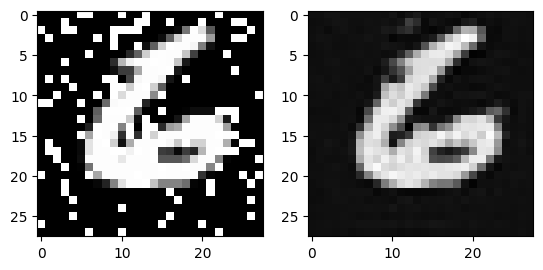

--------------------


In [ ]:
cnn_restore = UNet()                                                                    # 實例化復原網路
cnn_restore.load_state_dict(torch.load("./unet_restore.pt", map_location="cuda:0"))     # 將參數讀入
if if_use_gpu:                                                                          # 是否使用 GPU
    cnn_restore.cuda()                                                                  # 將網路傳至GPU

for noisy in range(0,4): # 0%, 5%, 10%, 15%
    cnn = CNN()                                                                         # 實例化辨識網路
    cnn.load_state_dict(torch.load("./cnn.pt", map_location="cuda:0"))
    if if_use_gpu:
        cnn.cuda()
    
    error1 = 0          # 記錄換原前的錯誤率
    error2 = 0          # 記錄換原後的錯誤率
    
    for step, (x, y) in enumerate(test_loader):
        if if_use_gpu:
            x = x.cuda()
            y = y.cuda()

        # 加上雜訊
        random_seq = random.sample([n for n in range(img_size)], np.int32(img_size*0.05*noisy))
        x = x.reshape(-1,img_size)
        x[0][random_seq]=1
        x = torch.reshape(x,(1,1,28,28))
        r_x = cnn_restore(x)
        
        # 使用辨識模型預測結果
        output = cnn(x)
        result = torch.argmax(output, dim=1)
        A = result.tolist()
        B = y.tolist()
        if A[0] != B[0]:
            error1+=1    

        # 使用辨識模型預測復原結果
        output = cnn(r_x)
        result = torch.argmax(output, dim=1)
        A = result.tolist()
        B = y.tolist()
        if A[0] != B[0]:
            error2+=1
        
    error_rate1 = error1/10000
    error_rate2 = error2/10000
    
    # 印出不同雜訊時，各自的錯誤率
    print("Noisy ", '%.2f' % (0.05*noisy*100), "%")
    print("The error rate 1 is ", error_rate1*100,"%")
    print("The accuracy rate 1 is ", (1-error_rate1)*100,"%") 
    print("The error rate 2 is ", error_rate2*100,"%")
    print("The accuracy rate 2 is ", (1-error_rate2)*100,"%") 

    # 呈現復原前後的影像圖
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(x[0].permute(1, 2, 0).detach().cpu().numpy(), cmap='gray')
    plt.subplot(122)
    plt.imshow(r_x[0].permute(1, 2, 0).detach().cpu().numpy(), cmap='gray')
    plt.show()

    print("-"*20)
